<a href="https://colab.research.google.com/github/singhvkin/IPL-Data-analysis/blob/master/Breast_Cancer_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context about the dataset
### The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 

### Attribute Information:

### Age of patient at time of operation (numerical)
### Patient's year of operation (year - 1900, numerical)
### Number of positive axillary nodes detected (numerical)
### Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year




## Domain Knowledge 

### As axillary lymph nodes are near the breasts, they are often the first location to which breast cancer spreads if it moves beyond the breast tissue.


![alt text](https://ww5.komen.org/uploadedimages/Content_Images/52229-2.gif)


### After a breast cancer diagnosis, a doctor will often check whether cancer cells have spread to the axillary lymph nodes. This can help confirm the diagnosis and staging of the cancer.
 
### If the lymph nodes feel enlarged, it’s likely the cancer has spread. However, if the lymph nodes don’t feel enlarged, it doesn’t mean the nodes are negative (cancer-free).

### The pathologist checks the nodes under a microscope. Nearly one-third of women with negative lymph nodes based on a physical exam have nodes with cancer found during the pathology exam. And, some women with enlarged nodes during a physical exam have cancer-free nodes.


### Reference links:

#### https://www.medicalnewstoday.com/articles/319713.php

#### https://ww5.komen.org/BreastCancer/LymphNodeStatus.html






## Objective

### To explore the factors which could be important for predicting survival of breast cancer patients

In [0]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv')                               
df.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
df['Status'] = df['Status'].map({1:"yes", 2:"no"})
df['Status'] = df['Status'].astype('category')
#Mapping integers to categorical values

In [0]:
profile = df.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


In [0]:
df.describe()

,Age,Years_of_operation,Pos_axillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Preliminary Observations:
### 1. There are 306 datapoints
### 2. Patient's age ranges from 30 to 83 years, with median and mean value being 52
### 3. The year of operation ranges from 1958 to 1969
### 4. Maximum number of nodes detected is 52. But there were 136 instances with zero pos_axillary_nodes
### 5. The dataset has 225 patients surviving for 5 years or longer
### 6. There are 17 duplicate rows in the dataset. It is difficult to ascertain if that is the result of duplicate entries or similar cases during the time period
### 7. There is not much correlation among the features
### 8. There is no missing data, hence no need to impute any column


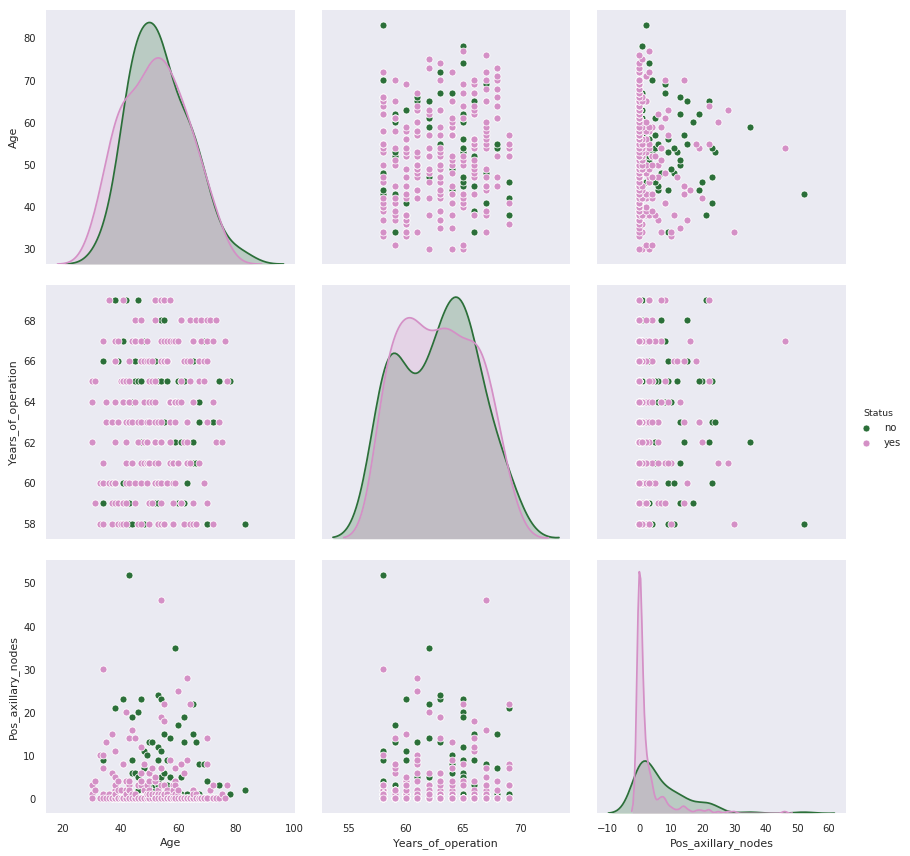

In [0]:
sns.set_style('dark')
sns.pairplot(df, hue='Status', height=4, diag_kind='kde', palette="cubehelix")

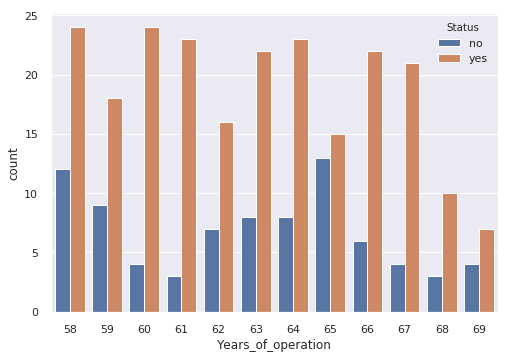

In [0]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Years_of_operation", hue="Status", data=df)

## Observations from Pairplot

### 1. Most patients have 0-10 pos_axillary_nodes
### 2. Patients with 0-6 pos_axillary_nodes are more likely to survive 
### 3. Most patients operated in 1961 survived, while 1965 seems to be the worst year
### 4. Only rare patients had more than 30 pos_axillary_nodes


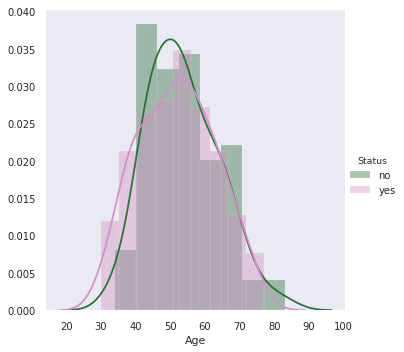

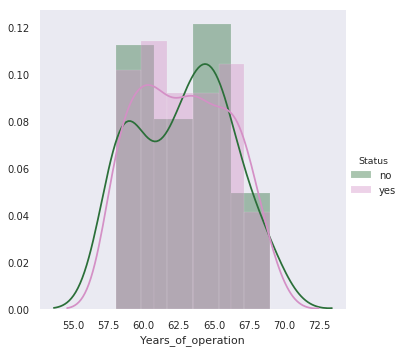

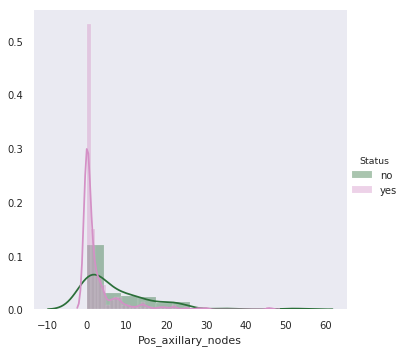

In [0]:
for (idx, feature) in enumerate(df.columns[:-1]):
    sns.FacetGrid(df, hue="Status", height=5, palette = "cubehelix").map(sns.distplot, feature).add_legend();
    plt.show();

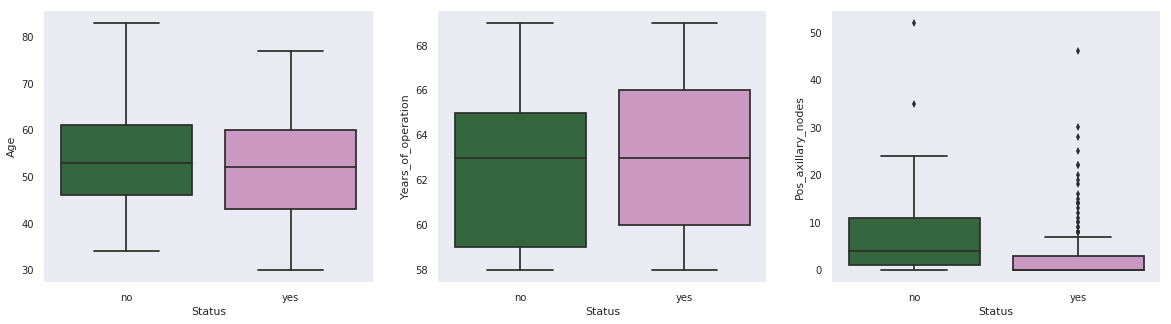

In [0]:
fig, axarr = plt.subplots(1, 3, figsize = (20, 5))
for (idx, feature) in enumerate(df.columns[:-1]):
    sns.boxplot(
        x = 'Status',
        y = feature,
        palette = "cubehelix",
        data = df,
        ax = axarr[idx]
    )    
plt.show()

## Observations from both plots:

### Patients below 40 years of age are more likely to survive, whereas patients above 60 years are likely to die

### The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.

### The number of positive lymph nodes of the survivors is highly densed from 0 to 5. Most patients who dies have atleast one pos_axillary_node.

### Some of the patients with zero pos_axillary_nodes died within 5 years. whereas some of them with even more than 7-8 pos_axillary_nodes lived beyond 5 years. This means that the number of pos_axillary_nodes although indicative, cannot be the only yardstick to predict the survival status of the patients

## Conclusion

### Number of positive axillary nodes detected is an important feature for predicting the survival status of patients. However as we saw from the domain knowledge note, results of physical test and pathological test can vary. Hence additional data of other test results would have probably been more helpful in predicting the results accurately

### Although there is a lot of overlapping data in age, we could say early diagnosis leads to better chances of survival. This is intuitive because early diagnosis would mean that the cancer is still at an early stage and can be contained before it spreads

### Year of operation has a lot of overlap and although some years seem to be better than the others, it is difficult to say if year could have a bearing on the chances of survival